# Build face mask detection using fine tuning model

In [7]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt 

from google.colab import files

# Directory
from os import listdir

# Image Processing
from tensorflow.keras.preprocessing.image import load_img
from sklearn.utils import shuffle
from matplotlib import rcParams

Using TensorFlow backend.


In [2]:
tf.__version__

'2.2.0'

You need to sync our code since we gonna load the data from API. I will using Kaggle API so it will get easier to access and working with the data.

In [3]:
# Upload json kaggle API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cindyalifiaputri","key":"4c18feb5a9e547be106c84967592484a"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json # set permission

kaggle.json


In [5]:
# Download dataset using Kaggle API
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 99% 326M/330M [00:09<00:00, 34.7MB/s]
100% 330M/330M [00:09<00:00, 36.9MB/s]


Unzip file to get the data (don't worry it will only load in Colab so your local memory will save, unless you download the file) 

In [6]:
# Unzip file 
!unzip 'face-mask-12k-images-dataset.zip' -d face_mask_image_dataset
clear_output()

# Prediction
This step I going to predict the model that I already save which is 'model.10-0.14.h5'. We'll gonna see the result of prediction from some sample of data testing 

In [8]:
def loadImages(list_path):
    # return list of images

    # Based URL
    URL = "face_mask_image_dataset/Face Mask Dataset/"
    loadedImages=[]

    # Read each Image and get to the list
    for path in list_path:
        print("[INFO] loading "+path+" dataset . . . ")
        imagesList = listdir(URL+path)
        temp = []
        for image in imagesList:
            # img = mpimg.imread(URL+path +"/"+ image)
            img = load_img(URL+path +"/"+ image, target_size=(224, 224))
            temp.append(img)
        loadedImages+=temp

    return loadedImages

In [9]:

def class_result(list_predict):
    """
    Function to define class of shapes
    """
    list_predict = list_predict.tolist()
    if list_predict.index(max(list_predict)) == 0:
        return 'WithMask'
    elif list_predict.index(max(list_predict)) == 1:
        return 'WithoutMask'


def predict_class(img_name, model):
    """
    Function to predict new image
    """
    test_image = image.img_to_array(img_name)
    test_image = np.expand_dims(test_image, axis=0)
    test_image /= 255.
    result = model.predict(test_image)
    plt.figure(figsize=(3,3))
    plt.imshow(img_name)
    plt.show()
    print('Predicted : ', class_result(result[0]))

## Load testing data

In [10]:
# Define URL for data test
df_test = loadImages(["Test/WithMask","Test/WithoutMask"])
df_test = shuffle(df_test, random_state=0)

[INFO] loading Test/WithMask dataset . . . 
[INFO] loading Test/WithoutMask dataset . . . 


### Show the example of testing data 

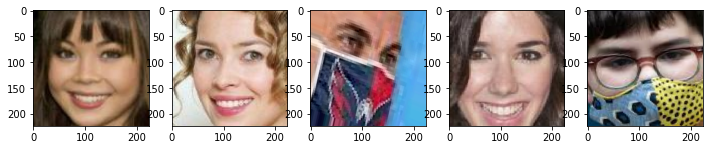

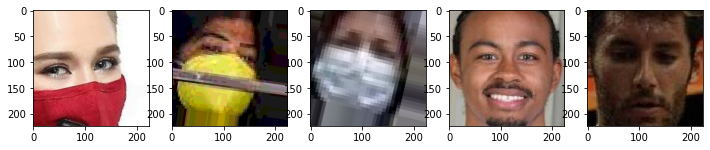

In [11]:
# Show the example of image in data train
%matplotlib inline

shuffle(df_test)

n_image=5

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,12

# display images
fig, ax = plt.subplots(1,n_image)

for i in range(n_image):
    ax[i].imshow(df_test[i]);

# display images
fig, ax = plt.subplots(1,n_image)

for i in range(n_image):
    ax[i].imshow(df_test[i+5]);

### Load another sample of testing data 

## Load Model

In [15]:
# Load model
model = load_model('MODEL/model.05-0.00.h5')

## Call predict function

### Try predict with testing data

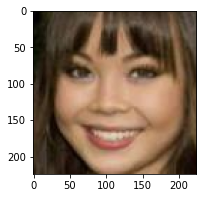

Predicted :  WithoutMask


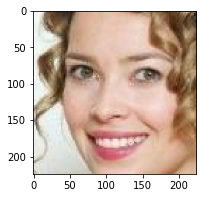

Predicted :  WithoutMask


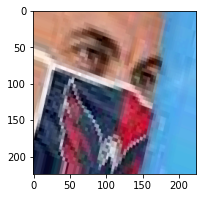

Predicted :  WithMask


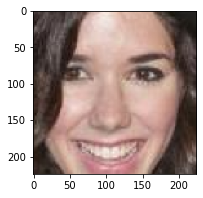

Predicted :  WithoutMask


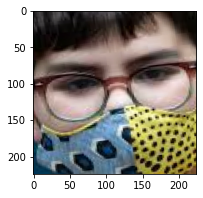

Predicted :  WithMask


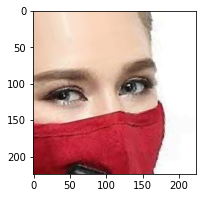

Predicted :  WithMask


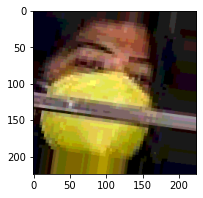

Predicted :  WithMask


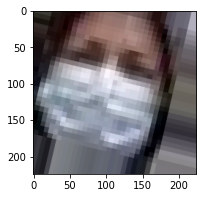

Predicted :  WithMask


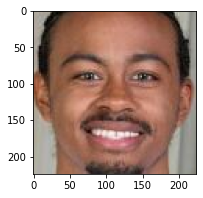

Predicted :  WithoutMask


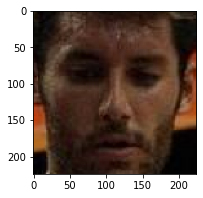

Predicted :  WithoutMask


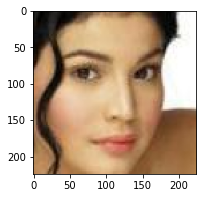

Predicted :  WithoutMask


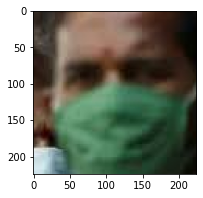

Predicted :  WithMask


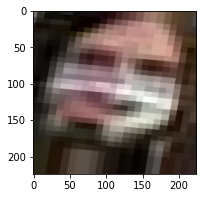

Predicted :  WithMask


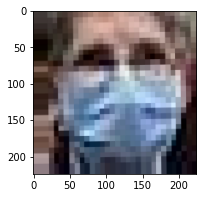

Predicted :  WithMask


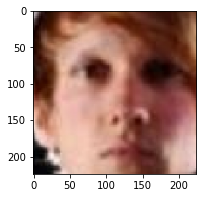

Predicted :  WithoutMask


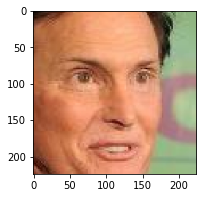

Predicted :  WithoutMask


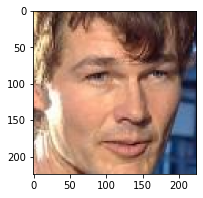

Predicted :  WithoutMask


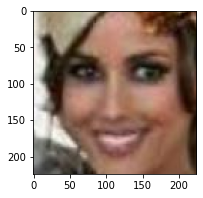

Predicted :  WithoutMask


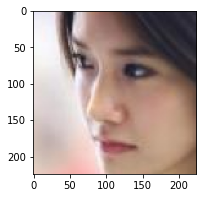

Predicted :  WithoutMask


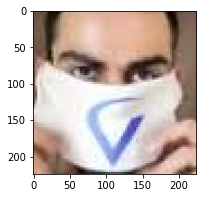

Predicted :  WithMask


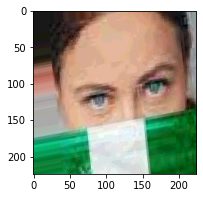

Predicted :  WithMask


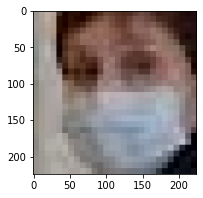

Predicted :  WithMask


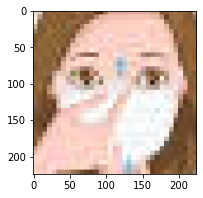

Predicted :  WithMask


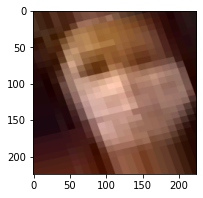

Predicted :  WithMask


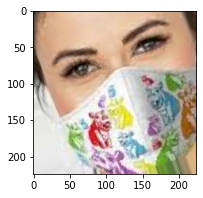

Predicted :  WithMask


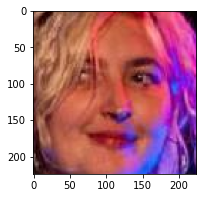

Predicted :  WithoutMask


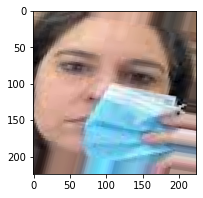

Predicted :  WithMask


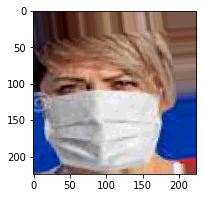

Predicted :  WithMask


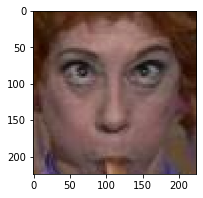

Predicted :  WithoutMask


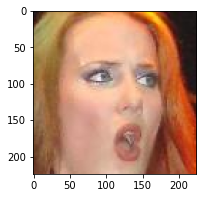

Predicted :  WithoutMask


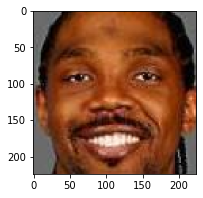

Predicted :  WithoutMask


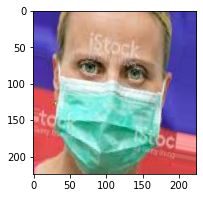

Predicted :  WithMask


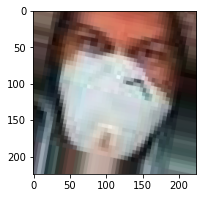

Predicted :  WithMask


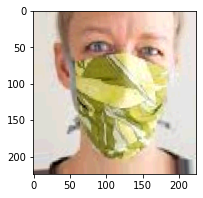

Predicted :  WithMask


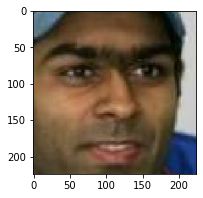

Predicted :  WithoutMask


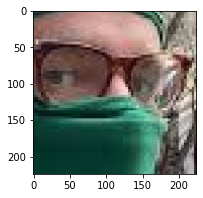

Predicted :  WithMask


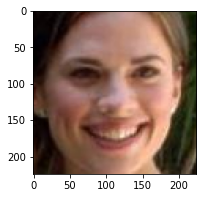

Predicted :  WithoutMask


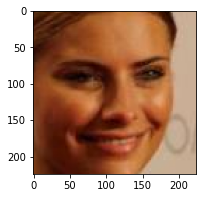

Predicted :  WithoutMask


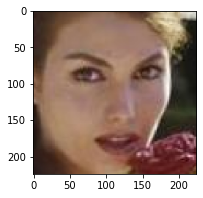

Predicted :  WithoutMask


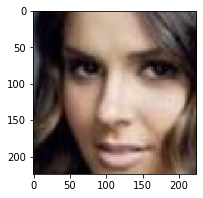

Predicted :  WithoutMask


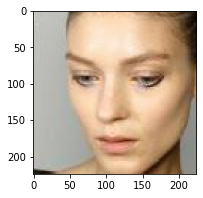

Predicted :  WithoutMask


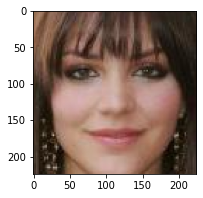

Predicted :  WithoutMask


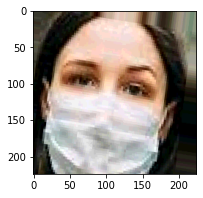

Predicted :  WithMask


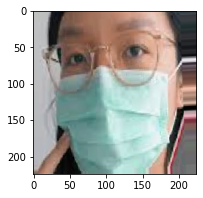

Predicted :  WithMask


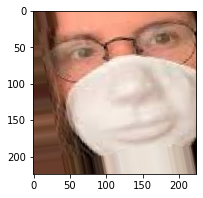

Predicted :  WithMask


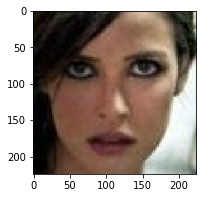

Predicted :  WithoutMask


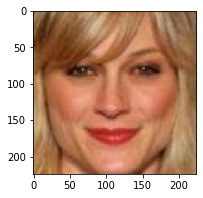

Predicted :  WithoutMask


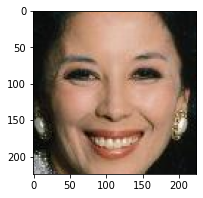

Predicted :  WithoutMask


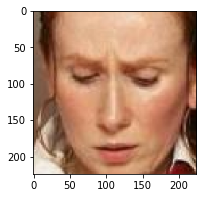

Predicted :  WithoutMask


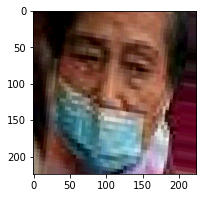

Predicted :  WithMask


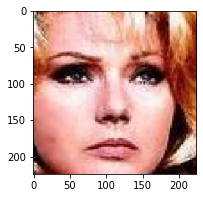

Predicted :  WithoutMask


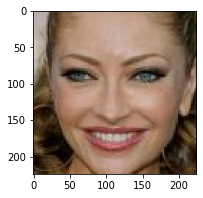

Predicted :  WithoutMask


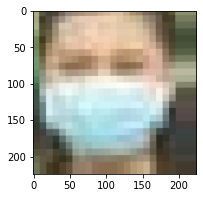

Predicted :  WithMask


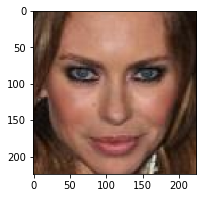

Predicted :  WithoutMask


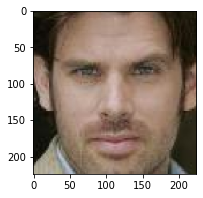

Predicted :  WithoutMask


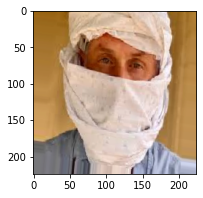

Predicted :  WithMask


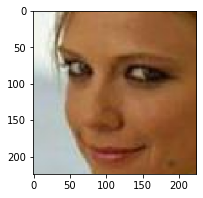

Predicted :  WithoutMask


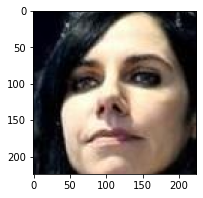

Predicted :  WithoutMask


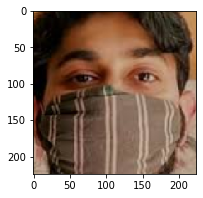

Predicted :  WithMask


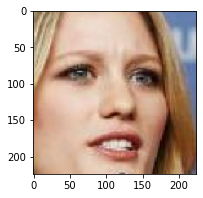

Predicted :  WithoutMask


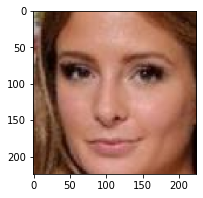

Predicted :  WithoutMask


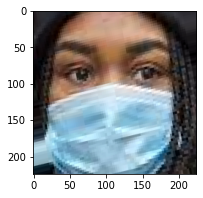

Predicted :  WithMask


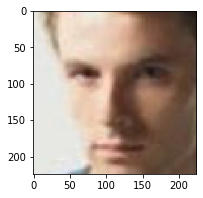

Predicted :  WithoutMask


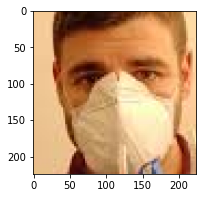

Predicted :  WithMask


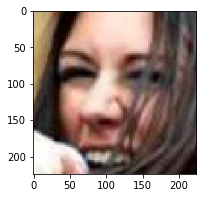

Predicted :  WithoutMask


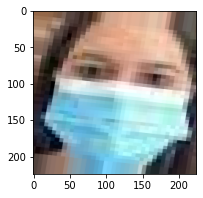

Predicted :  WithMask


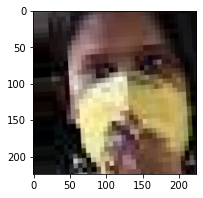

Predicted :  WithMask


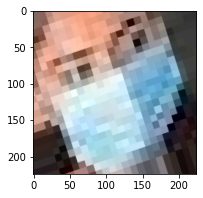

Predicted :  WithMask


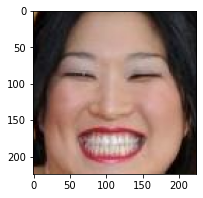

Predicted :  WithoutMask


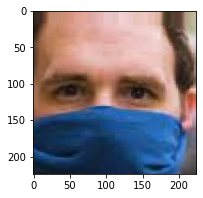

Predicted :  WithMask


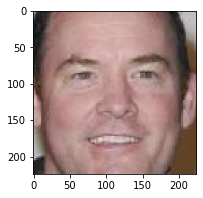

Predicted :  WithoutMask


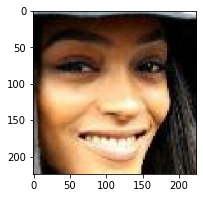

Predicted :  WithoutMask


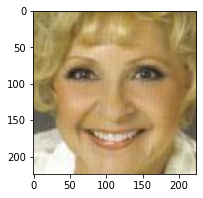

Predicted :  WithoutMask


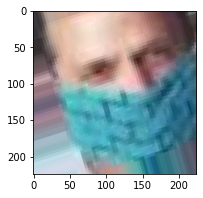

Predicted :  WithMask


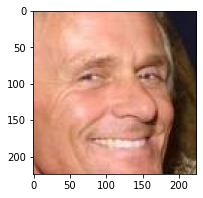

Predicted :  WithoutMask


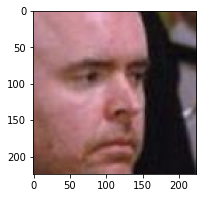

Predicted :  WithoutMask


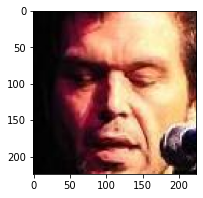

Predicted :  WithoutMask


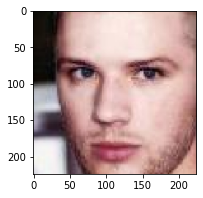

Predicted :  WithoutMask


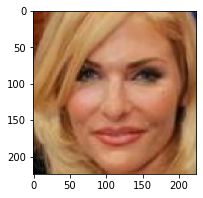

Predicted :  WithoutMask


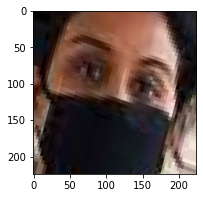

Predicted :  WithMask


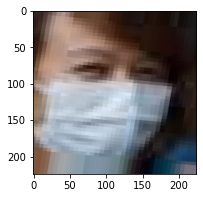

Predicted :  WithMask


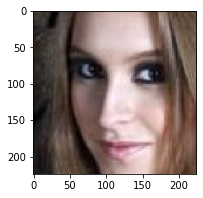

Predicted :  WithoutMask


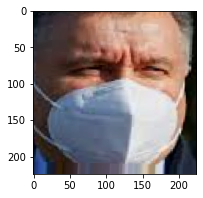

Predicted :  WithMask


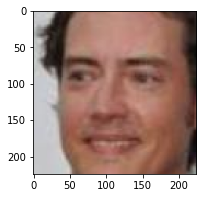

Predicted :  WithoutMask


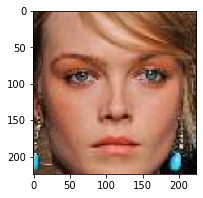

Predicted :  WithoutMask


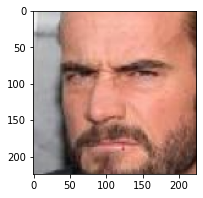

Predicted :  WithoutMask


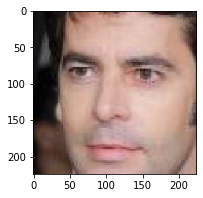

Predicted :  WithoutMask


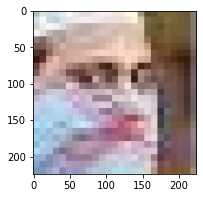

Predicted :  WithMask


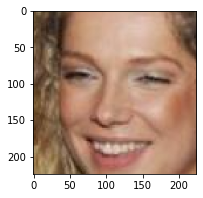

Predicted :  WithoutMask


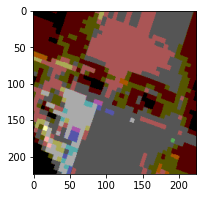

Predicted :  WithMask


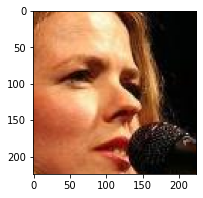

Predicted :  WithoutMask


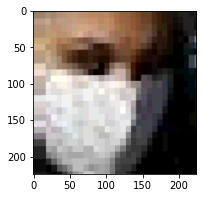

Predicted :  WithMask


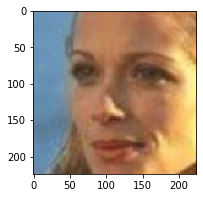

Predicted :  WithoutMask


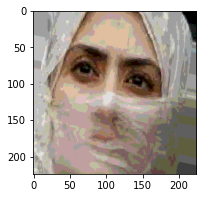

Predicted :  WithMask


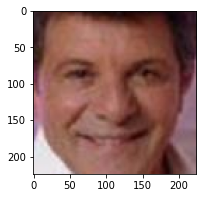

Predicted :  WithoutMask


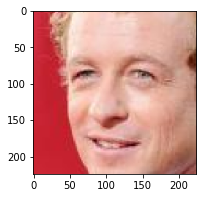

Predicted :  WithoutMask


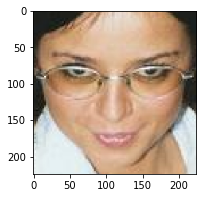

Predicted :  WithoutMask


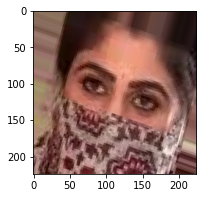

Predicted :  WithMask


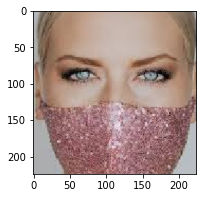

Predicted :  WithMask


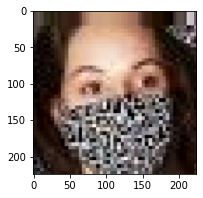

Predicted :  WithMask


In [16]:
# Classify
for i in range (100):
    predict_class(df_test[i], model)